In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer


%matplotlib inline
sns.set_style("whitegrid")

In [3]:
data=pd.read_csv("/content/creditcard.csv")
df=pd.DataFrame(data)
df.head()

<ipython-input-3-0e1c6d8da9c3>:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("/content/creditcard.csv")


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
data_info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33760 entries, 0 to 33759
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    33760 non-null  int64  
 1   V1      33760 non-null  float64
 2   V2      33760 non-null  float64
 3   V3      33760 non-null  float64
 4   V4      33760 non-null  float64
 5   V5      33760 non-null  float64
 6   V6      33760 non-null  float64
 7   V7      33760 non-null  float64
 8   V8      33760 non-null  float64
 9   V9      33760 non-null  float64
 10  V10     33760 non-null  float64
 11  V11     33760 non-null  float64
 12  V12     33760 non-null  float64
 13  V13     33760 non-null  float64
 14  V14     33760 non-null  float64
 15  V15     33760 non-null  float64
 16  V16     33760 non-null  float64
 17  V17     33760 non-null  float64
 18  V18     33760 non-null  float64
 19  V19     33760 non-null  float64
 20  V20     33760 non-null  float64
 21  V21     33760 non-null  float64
 22

In [5]:
pd.set_option("display.float", "{:.2f}".format)
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V23,V24,V25,V26,V27,V28,Amount,Class
count,33760.00,33760.00,33760.00,33760.00,33760.00,33760.00,33760.00,33760.00,33760.00,33760.00,...,33760.00,33760.00,33759.00,33759.00,33759.00,33759.00,33759.00,33759.00,33759.00,33759.00
mean,23186.50,-0.21,0.09,0.72,0.21,-0.22,0.09,-0.12,0.03,0.29,...,0.04,-0.03,-0.04,0.01,0.14,0.02,0.01,0.00,83.03,0.00
std,12310.55,1.85,1.55,1.57,1.41,1.40,1.31,1.27,1.26,1.24,...,0.67,0.78,0.54,0.59,0.44,0.51,0.39,0.30,227.87,0.06
min,0.00,-30.55,-40.98,-31.10,-5.17,-42.15,-23.50,-26.55,-41.48,-7.18,...,-13.69,-20.26,-26.75,-2.84,-7.50,-1.34,-8.57,-9.62,0.00,0.00
25%,11323.25,-0.96,-0.48,0.25,-0.71,-0.81,-0.65,-0.60,-0.16,-0.50,...,-0.16,-0.24,-0.18,-0.33,-0.13,-0.33,-0.06,-0.01,6.91,0.00
50%,28260.50,-0.24,0.13,0.83,0.19,-0.25,-0.17,-0.07,0.04,0.16,...,-0.02,-0.08,-0.05,0.06,0.17,-0.06,0.01,0.02,21.00,0.00
75%,33557.25,1.16,0.77,1.46,1.09,0.30,0.48,0.44,0.30,1.03,...,0.17,0.09,0.08,0.40,0.42,0.30,0.09,0.08,75.00,0.00
max,37373.00,1.96,16.71,4.10,13.14,34.10,22.53,36.68,20.01,10.39,...,17.28,22.61,13.88,4.01,5.53,3.52,11.14,5.68,7879.42,1.00


In [6]:
df.shape

(33760, 31)

In [7]:
df.loc[0:6]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0.00
1,0,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0.00
2,1,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0.00
3,1,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0.00
4,2,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0.00
5,2,-0.43,0.96,1.14,-0.17,0.42,-0.03,0.48,0.26,-0.57,...,-0.21,-0.56,-0.03,-0.37,-0.23,0.11,0.25,0.08,3.67,0.00
6,4,1.23,0.14,0.05,1.20,0.19,0.27,-0.01,0.08,0.46,...,-0.17,-0.27,-0.15,-0.78,0.75,-0.26,0.03,0.01,4.99,0.00


In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V23,V24,V25,V26,V27,V28,Amount,Class
count,33760.00,33760.00,33760.00,33760.00,33760.00,33760.00,33760.00,33760.00,33760.00,33760.00,...,33760.00,33760.00,33759.00,33759.00,33759.00,33759.00,33759.00,33759.00,33759.00,33759.00
mean,23186.50,-0.21,0.09,0.72,0.21,-0.22,0.09,-0.12,0.03,0.29,...,0.04,-0.03,-0.04,0.01,0.14,0.02,0.01,0.00,83.03,0.00
std,12310.55,1.85,1.55,1.57,1.41,1.40,1.31,1.27,1.26,1.24,...,0.67,0.78,0.54,0.59,0.44,0.51,0.39,0.30,227.87,0.06
min,0.00,-30.55,-40.98,-31.10,-5.17,-42.15,-23.50,-26.55,-41.48,-7.18,...,-13.69,-20.26,-26.75,-2.84,-7.50,-1.34,-8.57,-9.62,0.00,0.00
25%,11323.25,-0.96,-0.48,0.25,-0.71,-0.81,-0.65,-0.60,-0.16,-0.50,...,-0.16,-0.24,-0.18,-0.33,-0.13,-0.33,-0.06,-0.01,6.91,0.00
50%,28260.50,-0.24,0.13,0.83,0.19,-0.25,-0.17,-0.07,0.04,0.16,...,-0.02,-0.08,-0.05,0.06,0.17,-0.06,0.01,0.02,21.00,0.00
75%,33557.25,1.16,0.77,1.46,1.09,0.30,0.48,0.44,0.30,1.03,...,0.17,0.09,0.08,0.40,0.42,0.30,0.09,0.08,75.00,0.00
max,37373.00,1.96,16.71,4.10,13.14,34.10,22.53,36.68,20.01,10.39,...,17.28,22.61,13.88,4.01,5.53,3.52,11.14,5.68,7879.42,1.00


In [9]:
x=df['Amount'].mean()
round(x,2)

83.03

In [10]:
df['Amount']. isnull()

,Amount
0,False
1,False
2,False
3,False
4,False
...,...
33755,False
33756,False
33757,False
33758,False


In [11]:
df['Amount']. isnull().sum()

1

In [12]:
df['Class']. isnull()

,Class
0,False
1,False
2,False
3,False
4,False
...,...
33755,False
33756,False
33757,False
33758,False


In [13]:
duplicate_records = data.duplicated().sum()

In [14]:
missing_data = data.isnull().sum()

In [15]:
df['Class']. isnull().sum()

1

In [16]:
data_description = data.describe()

data_info, missing_data, duplicate_records, data_description

(None,
 Time      0
 V1        0
 V2        0
 V3        0
 V4        0
 V5        0
 V6        0
 V7        0
 V8        0
 V9        0
 V10       0
 V11       0
 V12       0
 V13       0
 V14       0
 V15       0
 V16       0
 V17       0
 V18       0
 V19       0
 V20       0
 V21       0
 V22       0
 V23       1
 V24       1
 V25       1
 V26       1
 V27       1
 V28       1
 Amount    1
 Class     1
 dtype: int64,
 137,
           Time       V1       V2       V3       V4       V5       V6       V7  \
 count 33760.00 33760.00 33760.00 33760.00 33760.00 33760.00 33760.00 33760.00   
 mean  23186.50    -0.21     0.09     0.72     0.21    -0.22     0.09    -0.12   
 std   12310.55     1.85     1.55     1.57     1.41     1.40     1.31     1.27   
 min       0.00   -30.55   -40.98   -31.10    -5.17   -42.15   -23.50   -26.55   
 25%   11323.25    -0.96    -0.48     0.25    -0.71    -0.81    -0.65    -0.60   
 50%   28260.50    -0.24     0.13     0.83     0.19    -0.25    -0.17    -0.0

<ipython-input-17-c06cda062c4d>:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['Class'], sort = True)


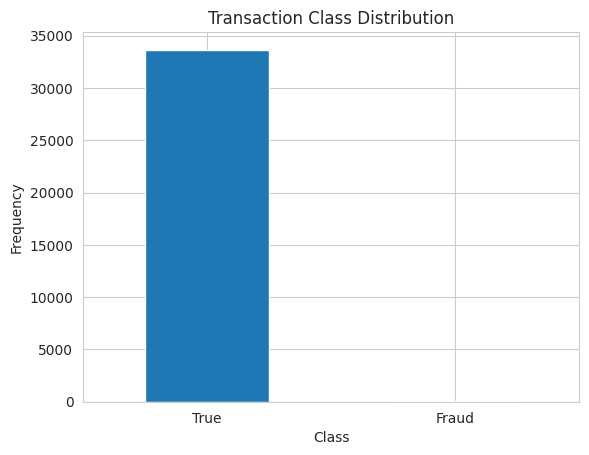

In [17]:
LABELS = ["True", "Fraud"]

count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [18]:
corr=df[['Time','V3','V4','Amount','Class']].corr()
corr

,Time,V3,V4,Amount,Class
Time,1.00,-0.07,-0.03,0.07,-0.01
V3,-0.07,1.00,-0.15,-0.17,-0.41
V4,-0.03,-0.15,1.00,0.10,0.22
Amount,0.07,-0.17,0.10,1.00,0.00
Class,-0.01,-0.41,0.22,0.00,1.00


In [19]:
df['V3']
df[['Time','V3','V4','Amount','Class']]

,Time,V3,V4,Amount,Class
0,0,2.54,1.38,149.62,0.00
1,0,0.17,0.45,2.69,0.00
2,1,1.77,0.38,378.66,0.00
3,1,1.79,-0.86,123.50,0.00
4,2,1.55,0.40,69.99,0.00
...,...,...,...,...,...
33755,37372,0.65,-1.15,300.00,0.00
33756,37373,-4.22,1.51,4476.72,0.00
33757,37373,-1.21,0.08,28.56,0.00
33758,37373,2.08,1.30,0.00,0.00


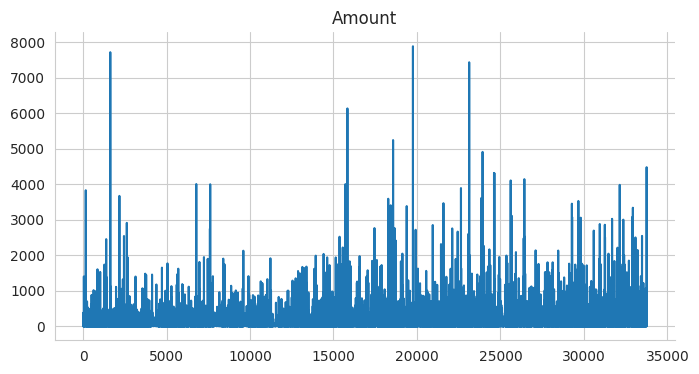

In [20]:
from matplotlib import pyplot as plt
data['Amount'].plot(kind='line', figsize=(8, 4), title='Amount')
plt.gca().spines[['top', 'right']].set_visible(False)

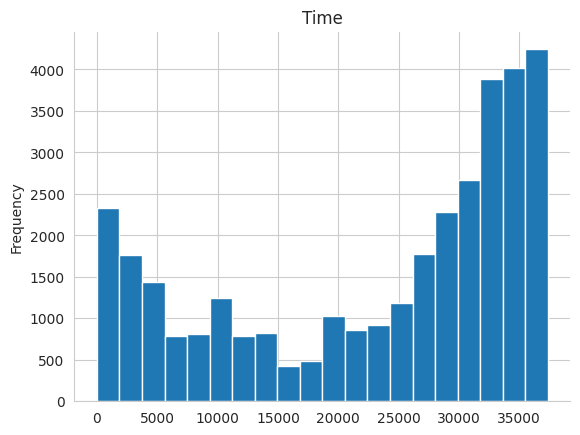

In [21]:
import pandas as pd
from matplotlib import pyplot as plt
data['Time'].plot(kind='hist', bins=20, title='Time')
plt.gca().spines[['top', 'right',]].set_visible(False)

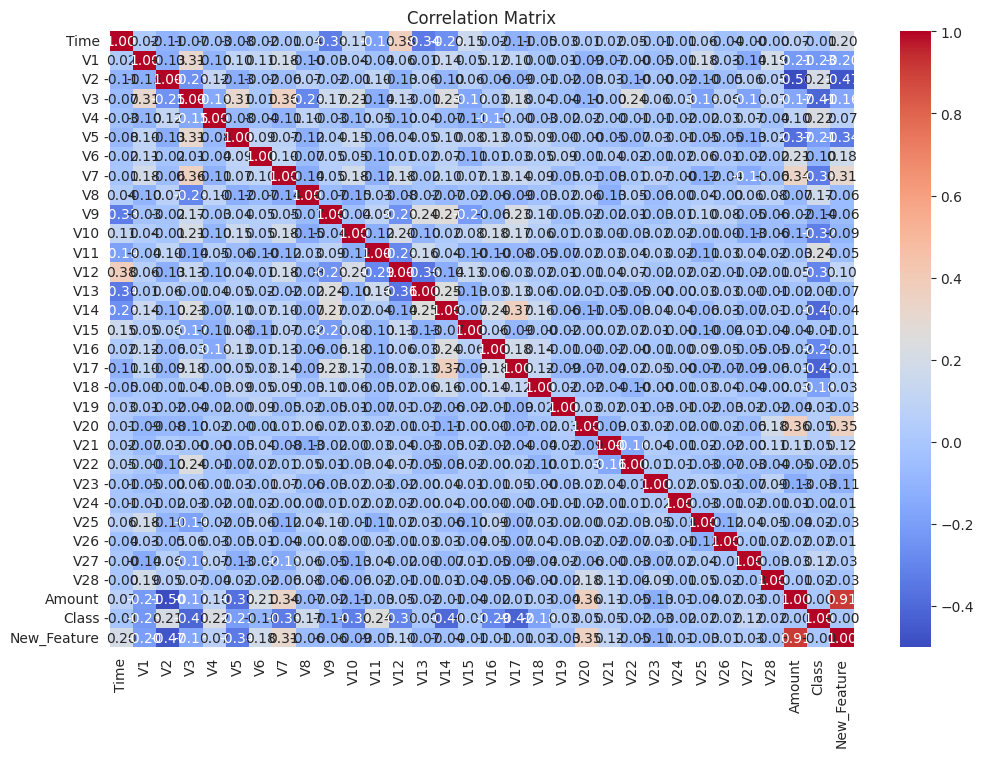

In [58]:

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


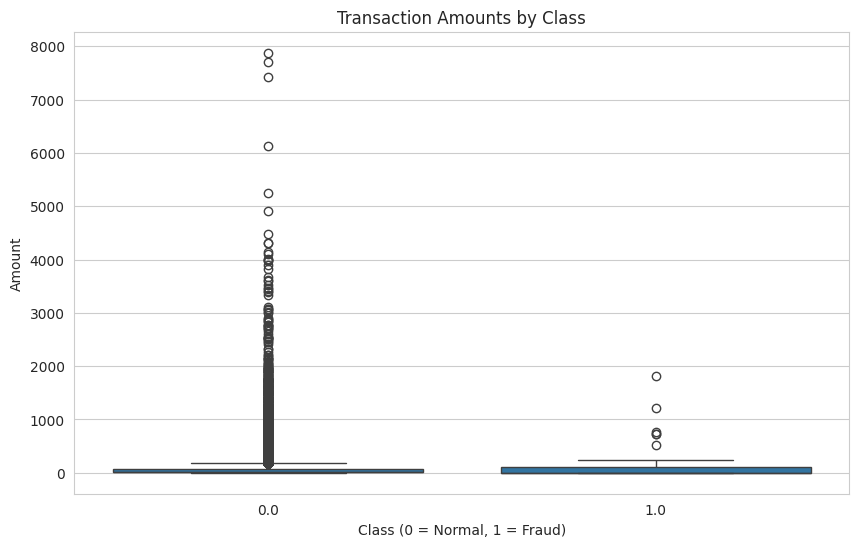

In [59]:
# Box plot for transaction amounts by class
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=data)
plt.title("Transaction Amounts by Class")
plt.xlabel("Class (0 = Normal, 1 = Fraud)")
plt.ylabel("Amount")
plt.show()

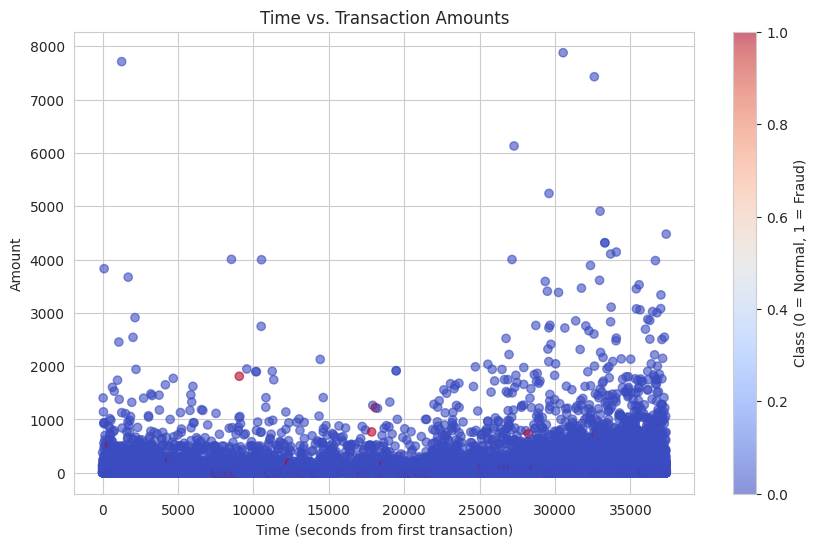

In [60]:
# Scatter plot of Time vs Amount
plt.figure(figsize=(10, 6))
plt.scatter(data['Time'], data['Amount'], c=data['Class'], cmap='coolwarm', alpha=0.6)
plt.title("Time vs. Transaction Amounts")
plt.xlabel("Time (seconds from first transaction)")
plt.ylabel("Amount")
plt.colorbar(label="Class (0 = Normal, 1 = Fraud)")
plt.show()

In [22]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [23]:
data.Class.value_counts()

,count
Class,
0.00,33656
1.00,103


In [24]:
cheating= data[data['Class']==1]
normal = data[data['Class']==0]
pd.concat([cheating.Amount.describe(), normal.Amount.describe()], axis=1)

,Amount,Amount
count,103.00,33656.00
mean,90.47,83.01
std,247.17,227.81
min,0.00,0.00
25%,1.00,6.99
50%,3.76,21.04
75%,99.99,75.00
max,1809.68,7879.42


In [25]:
pd.concat([cheating.Time.describe(), normal.Time.describe()], axis=1)

,Time,Time
count,103.00,33656.00
mean,20498.29,23194.31
std,10224.60,12315.56
min,406.00,0.00
25%,11086.00,11324.75
50%,20451.00,28276.00
75%,28641.50,33562.00
max,37167.00,37373.00


array([[<Axes: title={'center': 'Time'}>]], dtype=object)

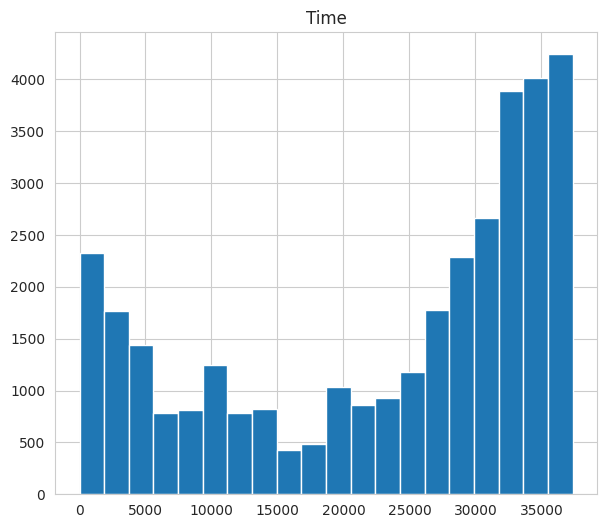

In [26]:
df.hist(column="Time", figsize=(7,6), bins=20)

<ipython-input-27-71e2bfb750ad>:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['Class'], sort = True)


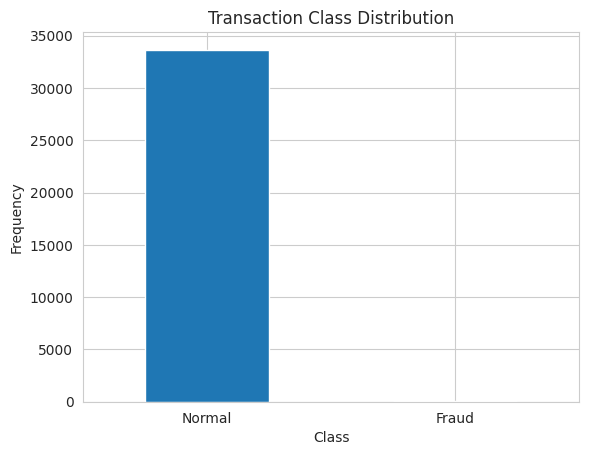

In [27]:
LABELS = ["Normal", "Fraud"]

count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>],
       [<Axes: title={'center': 'V5'}>, <Axes: title={'center': 'V6'}>,
        <Axes: title={'center': 'V7'}>, <Axes: title={'center': 'V8'}>,
        <Axes: title={'center': 'V9'}>],
       [<Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>,
        <Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>],
       [<Axes: title={'center': 'V15'}>, <Axes: title={'center': 'V16'}>,
        <Axes: title={'center': 'V17'}>, <Axes: title={'center': 'V18'}>,
        <Axes: title={'center': 'V19'}>],
       [<Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V23'}>, <Axes: title={'center': 'V24'}>,
        <Axes: title={'center': 'V25'}>],
       [<Axes: title={'center': 'V26'}>, <Axes: title={'ce

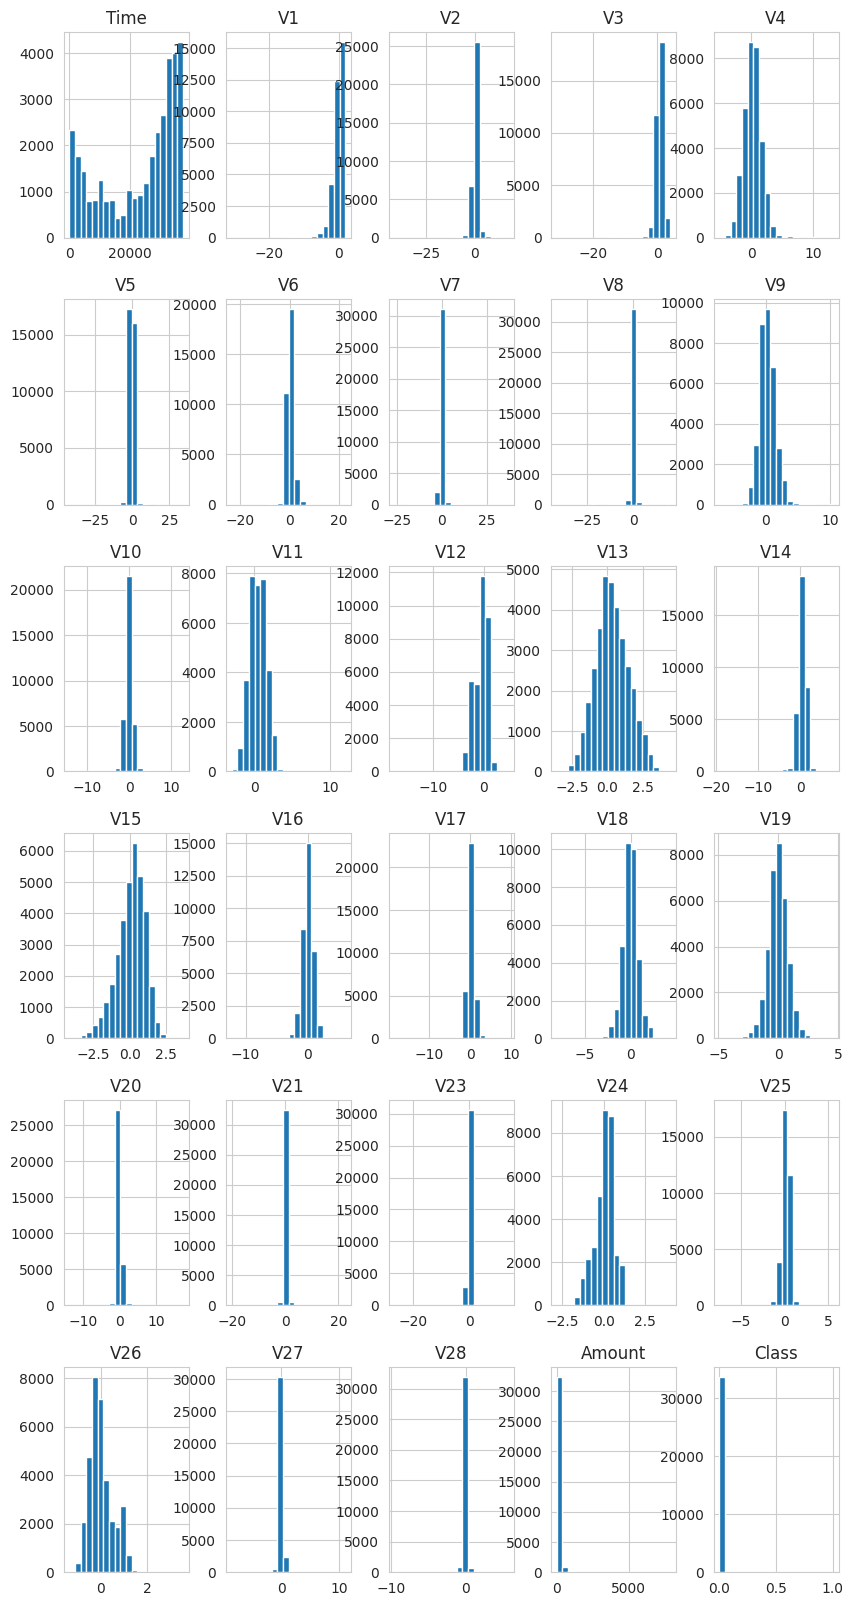

In [28]:
df.hist(figsize=(10,20), bins=20)

# Data Mining

Handle Missing Values

In [30]:

# Replace hyphens with NaN
data = data.replace('-', pd.NA)

# Convert columns with object dtype to numeric, coercing errors to NaN
for col in data.select_dtypes(include=['object']).columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Now apply the imputer
imputer = SimpleImputer(strategy='median')
data_imputed = imputer.fit_transform(data)

Convert back to DataFrame for easier handling

In [31]:
data_imputed = pd.DataFrame(data_imputed, columns=data.columns)
print("Data after handling missing values:")
print(data_imputed.head())

Data after handling missing values:
   Time    V1    V2   V3    V4    V5    V6    V7    V8    V9  ...   V21   V22  \
0  0.00 -1.36 -0.07 2.54  1.38 -0.34  0.46  0.24  0.10  0.36  ... -0.02  0.28   
1  0.00  1.19  0.27 0.17  0.45  0.06 -0.08 -0.08  0.09 -0.26  ... -0.23 -0.64   
2  1.00 -1.36 -1.34 1.77  0.38 -0.50  1.80  0.79  0.25 -1.51  ...  0.25  0.77   
3  1.00 -0.97 -0.19 1.79 -0.86 -0.01  1.25  0.24  0.38 -1.39  ... -0.11  0.01   
4  2.00 -1.16  0.88 1.55  0.40 -0.41  0.10  0.59 -0.27  0.82  ... -0.01  0.80   

    V23   V24   V25   V26   V27   V28  Amount  Class  
0 -0.11  0.07  0.13 -0.19  0.13 -0.02  149.62   0.00  
1  0.10 -0.34  0.17  0.13 -0.01  0.01    2.69   0.00  
2  0.91 -0.69 -0.33 -0.14 -0.06 -0.06  378.66   0.00  
3 -0.19 -1.18  0.65 -0.22  0.06  0.06  123.50   0.00  
4 -0.14  0.14 -0.21  0.50  0.22  0.22   69.99   0.00  

[5 rows x 31 columns]


**Binning**

Binning by mean

In [32]:
data_imputed['Binned_Amount'] = pd.cut(data_imputed['Amount'], bins=5, labels=False)

Group by the binned values and calculate the mean

In [33]:
binned_means = data_imputed.groupby('Binned_Amount')['Amount'].mean()

Map the means back to the Binned_Amount column

In [34]:
data_imputed['Binned_Amount'] = data_imputed['Binned_Amount'].map(binned_means)
#Output

print("Data after binning:")
print(data_imputed[['Amount', 'Binned_Amount']].head())

Data after binning:
   Amount  Binned_Amount
0  149.62          72.93
1    2.69          72.93
2  378.66          72.93
3  123.50          72.93
4   69.99          72.93


# **Reduction**

Dimensionality Reduction

In [35]:
from sklearn.decomposition import PCA

# Dimensionality Reduction using PCA
pca = PCA(n_components=10)
data_reduced = pca.fit_transform(data_imputed)

# Convert back to DataFrame for easier handling
data_reduced = pd.DataFrame(data_reduced, columns=[f'PC{i}' for i in range(1, 11)])
print("Data after PCA:")
print(data_reduced.head())

Data after PCA:
        PC1    PC2     PC3  PC4   PC5  PC6   PC7   PC8   PC9  PC10
0 -23186.40  77.79  -57.43 0.31 -1.84 2.09 -0.23  1.67  0.16 -0.29
1 -23186.59 -43.24   25.89 0.45  0.48 3.07 -0.85  0.35  0.11  0.51
2 -23185.10 266.45 -187.31 0.58 -1.46 2.53 -0.39  0.76  0.58 -0.51
3 -23185.43  56.27  -42.62 0.58 -1.56 2.63 -0.67 -0.32  0.74 -0.56
4 -23184.50  12.19  -12.27 0.03 -1.96 2.34  0.51  0.79 -0.19 -0.45


Attribute Subset Selection

In [36]:
from sklearn.ensemble import RandomForestClassifier


Feature selection using Random Forest

In [37]:
model = RandomForestClassifier()
model.fit(data_imputed.drop(columns=['Class']), data_imputed['Class'])
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

Select top 10 features

In [38]:
top_features = indices[:10]
data_selected = data_imputed.iloc[:, top_features]

Convert back to DataFrame for easier handling

In [39]:
data_selected = pd.DataFrame(data_selected, columns=data.columns[top_features])
print("Data after feature selection:")
print(data_selected.head())

Data after feature selection:
    V17   V12   V11   V14    V9   V26   V10    V4   V16   V18
0  0.21 -0.62 -0.55 -0.31  0.36 -0.19  0.09  1.38 -0.47  0.03
1 -0.11  1.07  1.61 -0.14 -0.26  0.13 -0.17  0.45  0.46 -0.18
2  1.11  0.07  0.62 -0.17 -1.51 -0.14  0.21  0.38 -2.89 -0.12
3 -0.68  0.18 -0.23 -0.29 -1.39 -0.22 -0.05 -0.86 -1.06  1.97
4 -0.24  0.54 -0.82 -1.12  0.82  0.50  0.75  0.40 -0.45 -0.04


# **Transformation**

**Normalization**

In [40]:
from sklearn.preprocessing import MinMaxScaler

*Normalizing*

In [41]:
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data_selected)

*Convert back to DataFrame for easier handling*

In [42]:
data_normalized = pd.DataFrame(data_normalized, columns=data_selected.columns)
print("Data after normalization:")
print(data_normalized.head())

Data after normalization:
   V17  V12  V11  V14   V9  V26  V10   V4  V16  V18
0 0.68 0.76 0.16 0.70 0.43 0.24 0.53 0.36 0.64 0.65
1 0.66 0.83 0.31 0.71 0.39 0.30 0.52 0.31 0.69 0.64
2 0.71 0.79 0.24 0.71 0.32 0.25 0.53 0.30 0.51 0.64
3 0.64 0.79 0.18 0.70 0.33 0.23 0.53 0.24 0.61 0.81
4 0.66 0.81 0.14 0.67 0.45 0.38 0.56 0.30 0.64 0.65


**Feature Engineering**

In [43]:
data['New_Feature'] = data['Amount'] * data['Time']#Creating a new feature
print("Data with new feature:")
print(data[['Amount', 'Time', 'New_Feature']].head())

Data with new feature:
   Amount  Time  New_Feature
0  149.62     0         0.00
1    2.69     0         0.00
2  378.66     1       378.66
3  123.50     1       123.50
4   69.99     2       139.98


# **Data Mining**

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

Initialize model

In [45]:
rf_model = RandomForestClassifier()
lr_model = LogisticRegression(max_iter=1000)
svc_model = SVC(probability=True)

Train and evaluate RandomForestClassifier

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


print(df.columns)


df = df.dropna(subset=['Class'])



X = df[['V1', 'V2', 'V3']]


y = df['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
print("RandomForestClassifier Results:")
print("Classification Report:")
print(classification_report(y_test, rf_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_y_pred))

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
RandomForestClassifier Results:
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8411
         1.0       0.79      0.38      0.51        29

    accuracy                           1.00      8440
   macro avg       0.89      0.69      0.76      8440
weighted avg       1.00      1.00      1.00      8440

Confusion Matrix:
[[8408    3]
 [  18   11]]


Train and evaluate Logistic Regression

In [47]:
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)
print("\nLogistic Regression Results:")
print("Classification Report:")
print(classification_report(y_test, lr_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, lr_y_pred))


Logistic Regression Results:
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8411
         1.0       0.56      0.34      0.43        29

    accuracy                           1.00      8440
   macro avg       0.78      0.67      0.71      8440
weighted avg       1.00      1.00      1.00      8440

Confusion Matrix:
[[8403    8]
 [  19   10]]


Train and evaluate Support Vector Classifier

In [48]:
svc_model.fit(X_train, y_train)
svc_y_pred = svc_model.predict(X_test)
print("\nSupport Vector Classifier Results:")
print("Classification Report:")
print(classification_report(y_test, svc_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, svc_y_pred))


Support Vector Classifier Results:
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8411
         1.0       0.86      0.41      0.56        29

    accuracy                           1.00      8440
   macro avg       0.93      0.71      0.78      8440
weighted avg       1.00      1.00      1.00      8440

Confusion Matrix:
[[8409    2]
 [  17   12]]


Evaluation of model

In [49]:
from sklearn.model_selection import cross_val_score

Cross-validation for RandomForestClassifier

In [50]:
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("\nRandomForestClassifier Cross-validation Scores:", rf_cv_scores)
print("Mean Cross-validation Score:", rf_cv_scores.mean())


RandomForestClassifier Cross-validation Scores: [0.99748223 0.9965936  0.99777844 0.99777844 0.9971856 ]
Mean Cross-validation Score: 0.9973636607109636


Cross-validation for Logistic Regression

In [51]:
lr_cv_scores = cross_val_score(lr_model, X, y, cv=5)
print("\nLogistic Regression Cross-validation Scores:", lr_cv_scores)
print("Mean Cross-validation Score:", lr_cv_scores.mean())


Logistic Regression Cross-validation Scores: [0.99703791 0.99570498 0.99777844 0.99940758 0.99703748]
Mean Cross-validation Score: 0.9973932771764197


Cross-validation for Support Vector Classifier

In [52]:
svc_cv_scores = cross_val_score(svc_model, X, y, cv=5)
print("\nSupport Vector Classifier Cross-validation Scores:", svc_cv_scores)
print("Mean Cross-validation Score:", svc_cv_scores.mean())


Support Vector Classifier Cross-validation Scores: [0.99703791 0.99674171 0.99688981 0.99718602 0.9971856 ]
Mean Cross-validation Score: 0.9970082104739968


In [53]:
from sklearn.model_selection import GridSearchCV

Define parameter grids

In [54]:
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

lr_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}

svc_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

Grid search for RandomForestClassifier

In [55]:
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)
print("\nBest parameters for RandomForestClassifier:", rf_grid_search.best_params_)


Best parameters for RandomForestClassifier: {'max_depth': 10, 'n_estimators': 50}


Grid search for Logistic Regression

In [56]:
lr_grid_search = GridSearchCV(estimator=lr_model, param_grid=lr_param_grid, cv=5, n_jobs=-1)
lr_grid_search.fit(X_train, y_train)
print("\nBest parameters for Logistic Regression:", lr_grid_search.best_params_)


Best parameters for Logistic Regression: {'C': 0.01, 'solver': 'lbfgs'}


Grid search for Support Vector Classifier

In [57]:
svc_grid_search = GridSearchCV(estimator=svc_model, param_grid=svc_param_grid, cv=5, n_jobs=-1)
svc_grid_search.fit(X_train, y_train)
print("\nBest parameters for Support Vector Classifier:", svc_grid_search.best_params_)


Best parameters for Support Vector Classifier: {'C': 10, 'kernel': 'rbf'}
